In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats
import plotly.express as px

# Se cargan los datos y se visualiza la estructura

In [2]:
df = pd.read_csv("/home/jonathan/tesis/Data_Temperatura_Lluvia/2020_Accidentalidad.csv",sep=';')

In [3]:
df.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2019S040008,07/09/2020,23:00:00,"CALL. SAN MAXIMILIANO, 38",38,15.0,CIUDAD LINEAL,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 21 a 24 años,Hombre,NaN,NaN,"444578,153","4475148,102",N,NaN
1,2019S040008,07/09/2020,23:00:00,"CALL. SAN MAXIMILIANO, 38",38,15.0,CIUDAD LINEAL,Choque contra obstáculo fijo,Despejado,VMU eléctrico,Conductor,De 25 a 29 años,Mujer,NaN,NaN,"444578,153","4475148,102",N,NaN
2,2020S000001,01/01/2020,1:15:00,AVDA. CANILLEJAS A VICALVARO / CALL. SILFIDE,1,20.0,SAN BLAS-CANILLEJAS,Colisión fronto-lateral,NaN,Turismo,Conductor,De 18 a 20 años,Hombre,NaN,NaN,"447894,521","4476691,236",N,NaN
3,2020S000001,01/01/2020,1:15:00,AVDA. CANILLEJAS A VICALVARO / CALL. SILFIDE,1,20.0,SAN BLAS-CANILLEJAS,Colisión fronto-lateral,NaN,Turismo,Conductor,De 30 a 34 años,Hombre,NaN,NaN,"447894,521","4476691,236",S,NaN
4,2020S000002,01/01/2020,1:20:00,"CALL. SILVANO, 31",31,16.0,HORTALEZA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 21 a 24 años,Hombre,NaN,NaN,"445094,901","4478370,057",N,NaN


In [4]:
dimension = df.shape
tipos_de_datos = df.dtypes

print("Dimensión:")
print(dimension)
print(" ")
print(tipos_de_datos)

Dimensión:
(32433, 19)
 
num_expediente           object
fecha                    object
hora                     object
localizacion             object
numero                   object
cod_distrito            float64
distrito                 object
tipo_accidente           object
estado_meteorológico     object
tipo_vehiculo            object
tipo_persona             object
rango_edad               object
sexo                     object
cod_lesividad           float64
lesividad                object
coordenada_x_utm         object
coordenada_y_utm         object
positiva_alcohol         object
positiva_droga          float64
dtype: object


# Se verifica la cantidad de datos por categoria

In [5]:
df['cod_distrito'].value_counts()

13.0    2635
4.0     2486
15.0    2127
5.0     2084
11.0    2076
8.0     1786
20.0    1778
9.0     1756
6.0     1598
3.0     1530
1.0     1518
16.0    1508
10.0    1505
7.0     1491
2.0     1351
12.0    1217
18.0     976
17.0     971
14.0     961
21.0     545
19.0     532
Name: cod_distrito, dtype: int64

In [6]:
df['distrito'].value_counts()

PUENTE DE VALLECAS     2635
SALAMANCA              2486
CIUDAD LINEAL          2127
CHAMARTÍN              2084
CARABANCHEL            2076
FUENCARRAL-EL PARDO    1786
SAN BLAS-CANILLEJAS    1778
MONCLOA-ARAVACA        1756
TETUÁN                 1598
RETIRO                 1530
CENTRO                 1518
HORTALEZA              1508
LATINA                 1505
CHAMBERÍ               1491
ARGANZUELA             1351
USERA                  1217
VILLA DE VALLECAS       976
VILLAVERDE              971
MORATALAZ               961
BARAJAS                 545
VICÁLVARO               532
Name: distrito, dtype: int64

In [7]:
df['tipo_accidente'].value_counts()

Colisión fronto-lateral         8085
Alcance                         7294
Choque contra obstáculo fijo    4667
Colisión lateral                4386
Colisión múltiple               2231
Atropello a persona             2129
Caída                           2118
Colisión frontal                 899
Otro                             251
Solo salida de la vía            151
Vuelco                           145
Atropello a animal                75
Despeñamiento                      2
Name: tipo_accidente, dtype: int64

# Verificamos valores nulos

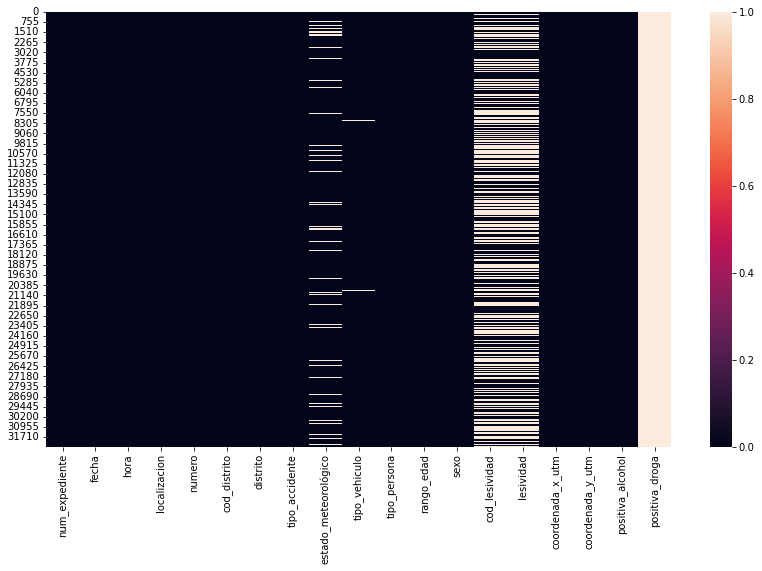

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull())
plt.show()

In [9]:
null_counts = df.isnull().sum()
print(null_counts)

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      2
cod_distrito                2
distrito                    2
tipo_accidente              0
estado_meteorológico     3196
tipo_vehiculo             137
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad           14802
lesividad               14802
coordenada_x_utm            2
coordenada_y_utm            2
positiva_alcohol          102
positiva_droga          32351
dtype: int64


In [10]:
'' in df.values

False

In [11]:
filas_con_dos_nulos = df[df['distrito'].isnull()]

# `filas_con_dos_nulos` ahora contiene las filas que tienen dos valores nulos en la columna especificada
filas_con_dos_nulos

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
27635,2020S016821,23/11/2020,7:45:00,"AUTOV. M-23, 0 (0.8 ENTRADA)",NaN,NaN,NaN,Colisión lateral,Despejado,Turismo,Conductor,De 50 a 54 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444975,42","4474103,079",N,NaN
27636,2020S016821,23/11/2020,7:45:00,"AUTOV. M-23, 0 (0.8 ENTRADA)",NaN,NaN,NaN,Colisión lateral,Despejado,Turismo,Conductor,De 50 a 54 años,Mujer,14.0,Sin asistencia sanitaria,"444975,42","4474103,079",N,NaN
